In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd

#### deaths

In [2]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', sep=',')
print(deaths.shape)
deaths.head()

(279, 652)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7249,7252,7253,7255,7260,7262,7266,7268,7269,7272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2855,2863,2870,2874,2880,2888,2893,2902,2909,2916
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5881,5883,5886,5890,5894,5899,5904,5907,5913,5918
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1685,1693,1695,1697,1701,1702,1703,1705,1707,1708


In [3]:
deaths = pd.melt(deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Deaths")
deaths.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [4]:
deaths = deaths[['Country/Region', 'Date', 'Deaths']].groupby(['Country/Region', 'Date']).max().reset_index()
deaths.head()

,Country/Region,Date,Deaths
0,Afghanistan,1/1/21,2201
1,Afghanistan,1/10/21,2277
2,Afghanistan,1/11/21,2288
3,Afghanistan,1/12/21,2301
4,Afghanistan,1/13/21,2308


In [5]:
def to_short_date(df):
    df['year'] = '20' + df.Date.str.split('/').str[2]

    df['day'] = df.Date.str.split('/').str[1]
    df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]

    df['month'] = df.Date.str.split('/').str[0]
    df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]
    
    df['Date'] = pd.to_datetime(df['year'] + '-' + df['month'] + '-' + df['day'])
    
    df.drop(columns=['day', 'year', 'month'], inplace=True)
    df.rename(columns={'Country/Region':'Country'}, inplace=True)
    return df


In [6]:
deaths = to_short_date(deaths)
deaths.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Deaths
0,Afghanistan,2021-01-01,2201
1,Afghanistan,2021-01-10,2277
2,Afghanistan,2021-01-11,2288
3,Afghanistan,2021-01-12,2301
4,Afghanistan,2021-01-13,2308


#### confirmed

In [7]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', sep=',')
print(confirmed.shape)
confirmed.head()

(279, 652)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374


In [8]:
confirmed = pd.melt(confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Confirmed")
confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [9]:
confirmed = confirmed[['Country/Region', 'Date', 'Confirmed']].groupby(['Country/Region', 'Date']).max().reset_index()
confirmed.head()

,Country/Region,Date,Confirmed
0,Afghanistan,1/1/21,52513
1,Afghanistan,1/10/21,53489
2,Afghanistan,1/11/21,53538
3,Afghanistan,1/12/21,53584
4,Afghanistan,1/13/21,53690


In [10]:
confirmed = to_short_date(confirmed)
confirmed.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Confirmed
0,Afghanistan,2021-01-01,52513
1,Afghanistan,2021-01-10,53489
2,Afghanistan,2021-01-11,53538
3,Afghanistan,2021-01-12,53584
4,Afghanistan,2021-01-13,53690


#### recovered

In [11]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv', sep=',')
print(recovered.shape)
recovered.head()

(264, 652)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
recovered = pd.melt(recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                  var_name="Date", value_name="Recovered")
recovered.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [13]:
recovered = recovered[['Country/Region', 'Date', 'Recovered']].groupby(['Country/Region', 'Date']).max().reset_index()
recovered.head()

,Country/Region,Date,Recovered
0,Afghanistan,1/1/21,41727
1,Afghanistan,1/10/21,43948
2,Afghanistan,1/11/21,44137
3,Afghanistan,1/12/21,44608
4,Afghanistan,1/13/21,44850


In [14]:
recovered = to_short_date(recovered)
recovered.head()

C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][df['day'].astype(int)<10] = '0' + df['day'][df['day'].astype(int)<10]
C:\Users\4880~1\AppData\Local\Temp/ipykernel_16292/2708416184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][df['month'].astype(int)<10] = '0' + df['month'][df['month'].astype(int)<10]


,Country,Date,Recovered
0,Afghanistan,2021-01-01,41727
1,Afghanistan,2021-01-10,43948
2,Afghanistan,2021-01-11,44137
3,Afghanistan,2021-01-12,44608
4,Afghanistan,2021-01-13,44850


#### vaccinated

In [15]:
vaccinated = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv', sep=',')
print(vaccinated.shape)
vaccinated.head()

(98142, 8)


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2021-02-22,0.0,0.0,0.0,2021-02-22,4.0,NaN
1,Afghanistan,2021-02-23,0.0,0.0,0.0,2021-02-23,4.0,NaN
2,Afghanistan,2021-02-24,0.0,0.0,0.0,2021-02-24,4.0,NaN
3,Afghanistan,2021-02-25,0.0,0.0,0.0,2021-02-25,4.0,NaN
4,Afghanistan,2021-02-26,0.0,0.0,0.0,2021-02-26,4.0,NaN


In [16]:
vaccinated.isna().sum()

Country_Region                     0
Date                               0
Doses_admin                       63
People_partially_vaccinated    56310
People_fully_vaccinated        56310
Report_Date_String                 0
UID                              371
Province_State                 42505
dtype: int64

In [17]:
vaccinated = vaccinated[['Country_Region', 'Date', 'Doses_admin', 'People_partially_vaccinated',
       'People_fully_vaccinated']].fillna(0).groupby(['Country_Region', 'Date']).max().reset_index()
vaccinated.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [18]:
vaccinated.rename(columns={'Country_Region':'Country'}, inplace=True)
vaccinated.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [19]:
vaccinated.Date = pd.to_datetime(vaccinated.Date)
vaccinated.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
0,Afghanistan,2021-02-22,0.0,0.0,0.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0


In [20]:
vaccinated.shape, confirmed.shape, deaths.shape, recovered.shape

((42505, 5), (126360, 3), (126360, 3), (126360, 3))

In [21]:
vaccinated.Date.min(), confirmed.Date.min()

(Timestamp('2020-12-14 00:00:00'), Timestamp('2020-01-22 00:00:00'))

In [22]:
join = vaccinated.merge(confirmed, how='outer', on=['Country', 'Date']). \
merge(deaths, how='outer', on=['Country', 'Date']). \
merge(recovered, how='outer', on=['Country', 'Date'])

join.head()

,Country,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered
0,Afghanistan,2021-02-22,0.0,0.0,0.0,55617.0,2433.0,48895.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,55646.0,2435.0,48967.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,55664.0,2436.0,49086.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,55680.0,2438.0,49281.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,55696.0,2442.0,49285.0


In [23]:
join.describe()

,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered
count,4.250500e+04,4.250500e+04,4.250500e+04,1.263600e+05,126360.000000,1.263600e+05
mean,3.888485e+07,2.134993e+07,1.364588e+07,4.582028e+05,10376.739633,1.856449e+05
std,3.174077e+08,1.735103e+08,1.212198e+08,2.384168e+06,46146.808432,1.098892e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.459570e+05,8.864900e+04,1.125300e+04,6.680000e+02,9.000000,0.000000e+00
50%,1.107254e+06,6.991410e+05,2.772550e+05,1.313000e+04,198.500000,1.962000e+03
75%,6.692185e+06,3.957687e+06,2.189634e+06,1.524312e+05,2791.250000,4.379425e+04
max,6.953998e+09,3.836414e+09,2.981198e+09,4.595319e+07,745668.000000,3.097475e+07


In [24]:
join.isna().sum()

Country                            0
Date                               0
Doses_admin                    84349
People_partially_vaccinated    84349
People_fully_vaccinated        84349
Confirmed                        494
Deaths                           494
Recovered                        494
dtype: int64

In [25]:
import warnings
warnings.filterwarnings("ignore")
import world_bank_data as wb
def actualize(df):
    df.reset_index(inplace=True)
    title = df['Series'].iloc[0]
    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Series','Year', 'Actual_year'], axis=1, inplace=True)
    df.columns = ['Country', title]
    return df

def actualize_2(df):
    df.reset_index(inplace=True)

    df.dropna(inplace=True)
    df['Actual_year'] = df.groupby('Country').Year.transform('max')
    df = df[df.Actual_year==df.Year]
    df.drop(columns=['Year'], axis=1, inplace=True)
    return df



df = actualize(pd.DataFrame(wb.get_series('SP.POP.TOTL')))
df2 = actualize_2(pd.DataFrame(wb.get_series('SP.POP.TOTL', id_or_value='id')))

population = df.merge(df2[['Country', 'Actual_year']], left_index=True, right_index=True). \
rename(columns={'Country_y':'ISO', 'Country_x':'Country'})


population.Country[population.Country.str.contains('Iran', case=False)] ='Iran'
population.Country[population.Country.str.contains('Korea, Rep.', case=False)] = 'Korea, South'
population.Country[population.Country.str.contains('Kyrgyz', case=False)] = 'Kyrgyzstan'
population.Country[population.Country.str.contains('Lao', case=False)] = 'Laos'
population.Country[population.Country.str.contains('Czech', case=False)] = 'Czechia'
population.Country[population.Country.str.contains('Micronesia', case=False)] = 'Micronesia'
population.Country[population.Country.str.contains('Russia', case=False)] = 'Russia'
population.Country[population.Country.str.contains('Kitts', case=False)] = 'Saint Kitts and Nevis'
population.Country[population.Country.str.contains('Myanmar', case=False)] = 'Burma'
population.Country[population.Country.str.contains('Vincent', case=False)] = 'Saint Vincent and the Grenadines'
population.Country[population.Country.str.contains('Slovak', case=False)] = 'Slovakia'
population.Country[population.Country.str.contains('Syr', case=False)] = 'Syria'
population.Country[population.Country.str.contains('United States', case=False)] = 'US'
population.Country[population.Country.str.contains('Venezuela', case=False)] = 'Venezuela'
population.Country[population.Country.str.contains('Bahamas', case=False)] = 'Bahamas'
population.Country[population.Country.str.contains('Brunei', case=False)] = 'Brunei'
population.Country[population.Country.str.contains('Egypt', case=False)] = 'Egypt'
population.Country[population.Country.str.contains('Gambia', case=False)] = 'Gambia'
population.Country[population.Country.str.contains('Lucia', case=False)] = 'Saint Lucia'
print(sorted(set(join.Country) - set(population.Country)))
#population.Country[population.Country.str.contains('United States', case=False)] = 'US (Aggregate)'


join = join.merge(population, how='inner', on='Country')


join.drop(columns=['Doses_admin', 'ISO'], inplace=True)

['Congo (Brazzaville)', 'Congo (Kinshasa)', 'Diamond Princess', 'Holy See', 'MS Zaandam', 'Summer Olympics 2020', 'Taiwan*', 'US (Aggregate)', 'Yemen']


In [26]:
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,"Population, total",Actual_year
0,Afghanistan,2021-02-22,0.0,0.0,55617.0,2433.0,48895.0,38928341.0,2020
1,Afghanistan,2021-02-23,0.0,0.0,55646.0,2435.0,48967.0,38928341.0,2020
2,Afghanistan,2021-02-24,0.0,0.0,55664.0,2436.0,49086.0,38928341.0,2020
3,Afghanistan,2021-02-25,0.0,0.0,55680.0,2438.0,49281.0,38928341.0,2020
4,Afghanistan,2021-02-26,0.0,0.0,55696.0,2442.0,49285.0,38928341.0,2020


In [27]:
join = join[join.Country != 'World']

In [28]:
join.sort_values(['Country', 'Date'], inplace=True)
join.reset_index(drop=True, inplace=True)
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,"Population, total",Actual_year
0,Afghanistan,2020-01-22,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
1,Afghanistan,2020-01-23,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
2,Afghanistan,2020-01-24,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
3,Afghanistan,2020-01-25,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
4,Afghanistan,2020-01-26,NaN,NaN,0.0,0.0,0.0,38928341.0,2020


In [29]:
join.columns = ['Country', 'Date', 'People_partially_vaccinated',
       'People_fully_vaccinated', 'Confirmed', 'Deaths', 'Recovered',
       'Population', 'Date_of_population']

In [30]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population
count,4.177900e+04,4.177900e+04,1.211760e+05,121176.000000,1.211760e+05,1.211760e+05
mean,1.042506e+07,6.595219e+06,4.776110e+05,10812.586725,1.934942e+05,4.042180e+07
std,6.050460e+07,4.597699e+07,2.432746e+06,47074.359736,1.121482e+06,1.482318e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.809200e+04
25%,8.423500e+04,1.076000e+04,8.470000e+02,10.000000,0.000000e+00,2.083380e+06
50%,6.608000e+05,2.653230e+05,1.481650e+04,232.000000,2.363000e+03,8.947027e+06
75%,3.686757e+06,2.091977e+06,1.673272e+05,3125.000000,4.997350e+04,2.913681e+07
max,1.154856e+09,1.070386e+09,4.595319e+07,745668.000000,3.097475e+07,1.402112e+09


In [31]:
join_copy = join.copy()
# join_copy.to_pickle('vaccination_data.pkl')
# join = pd.read_pickle('vaccination_data.pkl')
join = join_copy.copy()
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Date_of_population
0,Afghanistan,2020-01-22,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
1,Afghanistan,2020-01-23,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
2,Afghanistan,2020-01-24,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
3,Afghanistan,2020-01-25,NaN,NaN,0.0,0.0,0.0,38928341.0,2020
4,Afghanistan,2020-01-26,NaN,NaN,0.0,0.0,0.0,38928341.0,2020


In [32]:
join['Max_death_window'] = pd.DataFrame(join.groupby('Country').Deaths.expanding().max()).reset_index().drop(columns='level_1').Deaths
join['Mean_death_window'] = join.groupby('Country', as_index=False).Deaths.rolling(14).mean().Deaths

join['Max_partially_vaccinated_window'] = pd.DataFrame(join.groupby('Country').People_partially_vaccinated.expanding().max()).reset_index().drop(columns='level_1').People_partially_vaccinated
join['Mean_partially_vaccinated_window'] = join.groupby('Country', as_index=False).People_partially_vaccinated.rolling(14).mean().People_partially_vaccinated

join['Max_fully_vaccinated_window'] = pd.DataFrame(join.groupby('Country').People_fully_vaccinated.expanding().max()).reset_index().drop(columns='level_1').People_fully_vaccinated
join['Mean_fully_vaccinated_window'] = join.groupby('Country', as_index=False).People_fully_vaccinated.rolling(14).mean().People_fully_vaccinated



join.Deaths[join.Deaths<join.Max_death_window] = join.Max_death_window[join.Deaths<join.Max_death_window]

join.People_partially_vaccinated[join.People_partially_vaccinated<join.Max_partially_vaccinated_window] = \
join.Max_partially_vaccinated_window[join.People_partially_vaccinated<join.Max_partially_vaccinated_window]

join.People_fully_vaccinated[join.People_fully_vaccinated<join.Max_fully_vaccinated_window] = \
join.Max_fully_vaccinated_window[join.People_fully_vaccinated<join.Max_fully_vaccinated_window]

In [33]:
join['Deaths_1_day'] = (join['Deaths'] - join.groupby(['Country'])['Deaths'].shift(1))
join['Confirmed_1_day'] = (join['Confirmed'] - join.groupby(['Country'])['Confirmed'].shift(1))
join['Recovered_1_day'] = (join['Recovered'] - join.groupby(['Country'])['Recovered'].shift(1))

join['People_partially_vaccinated_1_day'] = (join['People_partially_vaccinated'] - join.groupby(['Country']) \
                                             ['People_partially_vaccinated'].shift(1))

join['People_fully_vaccinated_1_day'] = (join['People_fully_vaccinated'] - join.groupby(['Country']) \
                                             ['People_fully_vaccinated'].shift(1))

join[['Deaths_1_day', 'People_partially_vaccinated_1_day', 'People_fully_vaccinated_1_day']].describe()

,Deaths_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day
count,120989.000000,4.146600e+04,4.146600e+04
mean,41.067386,9.302403e+04,7.129337e+04
std,194.069537,3.918114e+06,3.028643e+06
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,0.000000e+00,0.000000e+00
75%,10.000000,1.320125e+04,8.424000e+03
max,8786.000000,6.220000e+08,5.537470e+08


In [34]:
print(join.shape)
join = join[(join.Deaths>0)&(join.People_partially_vaccinated>0)]
print(join.shape)

(121176, 20)
(38835, 20)


In [35]:
join['Country_mean_partially_vaccinated_1_day'] = join.groupby('Country').People_partially_vaccinated_1_day.transform('mean')
join['Country_mean_deaths_1_day'] = join.groupby('Country').Deaths_1_day.transform('mean')
join['Country_count'] = join.groupby('Country').Deaths_1_day.transform('count')

In [36]:
print(join.shape)
join = join[(join.Country_mean_partially_vaccinated_1_day>0)&(join.Country_mean_deaths_1_day>0)&(join.Country_count>10)]
print(join.shape)

(38835, 23)
(38500, 23)


In [37]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Max_death_window,Mean_death_window,Max_partially_vaccinated_window,Mean_partially_vaccinated_window,Max_fully_vaccinated_window,Mean_fully_vaccinated_window,Deaths_1_day,Confirmed_1_day,Recovered_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,Country_mean_partially_vaccinated_1_day,Country_mean_deaths_1_day,Country_count
count,3.850000e+04,3.850000e+04,3.850000e+04,38500.000000,3.850000e+04,3.850000e+04,38500.000000,38500.000000,3.850000e+04,3.574400e+04,3.850000e+04,3.574400e+04,38500.000000,38500.000000,3.850000e+04,3.832700e+04,3.832700e+04,3.850000e+04,38500.000000,38500.000000
mean,8.259489e+06,4.820069e+06,1.261261e+06,27048.241221,4.463033e+05,4.055956e+07,27048.241221,26545.195082,8.259489e+06,8.289329e+06,4.820069e+06,4.802772e+06,76.975273,4031.819922,-1.373850e+03,7.049370e+04,4.919288e+04,7.036551e+04,76.975273,256.793091
std,3.541156e+07,1.763192e+07,4.110411e+06,77870.945498,1.857237e+06,1.281077e+08,77870.945498,76670.749806,3.541156e+07,3.508784e+07,1.763192e+07,1.735907e+07,291.810001,16951.513239,1.966628e+05,3.848602e+05,2.264880e+05,2.378781e+05,208.314490,42.390356
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,1.000000,0.071429,1.000000e+00,2.857143e-01,0.000000e+00,0.000000e+00,0.000000,-349116.000000,-3.097475e+07,0.000000e+00,0.000000e+00,8.427891e+01,0.008032,70.000000
25%,1.617710e+05,2.353200e+04,4.186200e+04,582.000000,0.000000e+00,2.794700e+06,582.000000,556.053571,1.617710e+05,1.685176e+05,2.353200e+04,2.799298e+04,0.000000,43.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.588580e+03,2.308370,229.000000
50%,8.426420e+05,3.692720e+05,2.295090e+05,3421.000000,1.688900e+04,9.890400e+06,3421.000000,3304.357143,8.426420e+05,8.399117e+05,3.692720e+05,3.841957e+05,5.000000,431.000000,0.000000e+00,1.770000e+02,0.000000e+00,1.383276e+04,12.221106,256.000000
75%,4.170526e+06,2.348256e+06,7.287788e+05,14689.750000,2.309452e+05,3.423205e+07,14689.750000,14515.821429,4.170526e+06,4.190642e+06,2.348256e+06,2.341632e+06,33.000000,1963.000000,5.532500e+02,1.662900e+04,1.082000e+04,4.465443e+04,51.617284,298.000000
max,7.318120e+08,3.266774e+08,4.595319e+07,745668.000000,3.097475e+07,1.380004e+09,745668.000000,736032.214286,7.318120e+08,7.143959e+08,3.266774e+08,3.022535e+08,8786.000000,414188.000000,4.224360e+05,1.670510e+07,7.527206e+06,2.541014e+06,1388.146341,320.000000


In [38]:
join['People_partially_vaccinated_1_day_of_share'] = join['People_partially_vaccinated_1_day'] * 1000000 / join['Population'] 
join['People_partially_vaccinated_1_day_of_share'].describe()

count     38327.000000
mean       1864.966419
std        7893.956968
min           0.000000
25%           0.000000
50%          42.396996
75%        1683.646144
max      668765.615161
Name: People_partially_vaccinated_1_day_of_share, dtype: float64

In [39]:
join['Vaccinated_partially_share'] = join.People_partially_vaccinated / join['Population'] * 100
join['Vaccinated_fully_share'] = join.People_fully_vaccinated / join['Population'] * 100

In [40]:
join['Vaccinated_partially_scaled'] = (join.People_partially_vaccinated - join.groupby('Country').People_partially_vaccinated.transform('mean')) / \
join.groupby('Country').People_partially_vaccinated.transform('std')

join['Vaccinated_fully_scaled'] = (join.People_fully_vaccinated - join.groupby('Country').People_fully_vaccinated.transform('mean')) / \
join.groupby('Country').People_fully_vaccinated.transform('std')

In [41]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Max_death_window,Mean_death_window,Max_partially_vaccinated_window,Mean_partially_vaccinated_window,...,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,Country_mean_partially_vaccinated_1_day,Country_mean_deaths_1_day,Country_count,People_partially_vaccinated_1_day_of_share,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled
count,3.850000e+04,3.850000e+04,3.850000e+04,38500.000000,3.850000e+04,3.850000e+04,38500.000000,38500.000000,3.850000e+04,3.574400e+04,...,3.832700e+04,3.832700e+04,3.850000e+04,38500.000000,38500.000000,38327.000000,38500.000000,38500.000000,3.850000e+04,3.850000e+04
mean,8.259489e+06,4.820069e+06,1.261261e+06,27048.241221,4.463033e+05,4.055956e+07,27048.241221,26545.195082,8.259489e+06,8.289329e+06,...,7.049370e+04,4.919288e+04,7.036551e+04,76.975273,256.793091,1864.966419,24.883535,17.219019,2.954635e-17,-2.791418e-18
std,3.541156e+07,1.763192e+07,4.110411e+06,77870.945498,1.857237e+06,1.281077e+08,77870.945498,76670.749806,3.541156e+07,3.508784e+07,...,3.848602e+05,2.264880e+05,2.378781e+05,208.314490,42.390356,7893.956968,25.127601,21.757120,9.979979e-01,9.979979e-01
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,1.000000,0.071429,1.000000e+00,2.857143e-01,...,0.000000e+00,0.000000e+00,8.427891e+01,0.008032,70.000000,0.000000,0.000016,0.000000,-6.922332e+00,-2.406665e+00
25%,1.617710e+05,2.353200e+04,4.186200e+04,582.000000,0.000000e+00,2.794700e+06,582.000000,556.053571,1.617710e+05,1.685176e+05,...,0.000000e+00,0.000000e+00,3.588580e+03,2.308370,229.000000,0.000000,3.040382,0.561958,-8.723415e-01,-8.512757e-01
50%,8.426420e+05,3.692720e+05,2.295090e+05,3421.000000,1.688900e+04,9.890400e+06,3421.000000,3304.357143,8.426420e+05,8.399117e+05,...,1.770000e+02,0.000000e+00,1.383276e+04,12.221106,256.000000,42.396996,15.107553,6.032547,-1.110195e-01,-2.961662e-01
75%,4.170526e+06,2.348256e+06,7.287788e+05,14689.750000,2.309452e+05,3.423205e+07,14689.750000,14515.821429,4.170526e+06,4.190642e+06,...,1.662900e+04,1.082000e+04,4.465443e+04,51.617284,298.000000,1683.646144,43.850480,28.156391,8.893504e-01,8.933330e-01
max,7.318120e+08,3.266774e+08,4.595319e+07,745668.000000,3.097475e+07,1.380004e+09,745668.000000,736032.214286,7.318120e+08,7.143959e+08,...,1.670510e+07,7.527206e+06,2.541014e+06,1388.146341,320.000000,668765.615161,141.805976,87.499090,4.575153e+00,7.779158e+00


In [42]:
join['Deaths_1_day_of_share'] = join['Deaths_1_day'] * 1000000 / join['Population'] 
join['Deaths_1_day_of_share'].describe()

count    38500.000000
mean         2.418009
std          5.761058
min          0.000000
25%          0.000000
50%          0.522715
75%          2.603912
max        497.986177
Name: Deaths_1_day_of_share, dtype: float64

In [43]:
join['Deaths_1_day_scaled'] = (join.Deaths_1_day - join.groupby('Country').Deaths_1_day.transform('mean')) / \
join.groupby('Country').Deaths_1_day.transform('std')
join['Deaths_1_day_scaled'].describe()

count    3.850000e+04
mean    -1.022559e-17
std      9.979979e-01
min     -4.104720e+00
25%     -6.058129e-01
50%     -3.015436e-01
75%      3.042490e-01
max      1.655816e+01
Name: Deaths_1_day_scaled, dtype: float64

In [44]:
join['Country_max_vaccinated_partially_share'] = join.groupby('Country').Vaccinated_partially_share.transform('max')

In [45]:
join.drop(columns=['Date_of_population', 'Max_death_window',
       'Mean_death_window', 'Max_partially_vaccinated_window',
       'Mean_partially_vaccinated_window', 'Max_fully_vaccinated_window',
       'Mean_fully_vaccinated_window', 
       'Country_mean_partially_vaccinated_1_day', 'Country_mean_deaths_1_day',
       'Country_count'], inplace=True)

In [46]:
from scipy.stats import mannwhitneyu, ttest_ind, levene
import numpy as np
pd.set_option('use_inf_as_na', True)
pd.set_option("display.max_columns", 100)

In [47]:
join.describe()

,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Deaths_1_day,Confirmed_1_day,Recovered_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,People_partially_vaccinated_1_day_of_share,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,Deaths_1_day_of_share,Deaths_1_day_scaled,Country_max_vaccinated_partially_share
count,3.850000e+04,3.850000e+04,3.850000e+04,38500.000000,3.850000e+04,3.850000e+04,38500.000000,38500.000000,3.850000e+04,3.832700e+04,3.832700e+04,38327.000000,38500.000000,38500.000000,3.850000e+04,3.850000e+04,38500.000000,3.850000e+04,38500.000000
mean,8.259489e+06,4.820069e+06,1.261261e+06,27048.241221,4.463033e+05,4.055956e+07,76.975273,4031.819922,-1.373850e+03,7.049370e+04,4.919288e+04,1864.966419,24.883535,17.219019,2.954635e-17,-2.791418e-18,2.418009,-1.022559e-17,49.608105
std,3.541156e+07,1.763192e+07,4.110411e+06,77870.945498,1.857237e+06,1.281077e+08,291.810001,16951.513239,1.966628e+05,3.848602e+05,2.264880e+05,7893.956968,25.127601,21.757120,9.979979e-01,9.979979e-01,5.761058,9.979979e-01,26.423518
min,1.000000e+00,0.000000e+00,6.800000e+01,1.000000,0.000000e+00,3.393800e+04,0.000000,-349116.000000,-3.097475e+07,0.000000e+00,0.000000e+00,0.000000,0.000016,0.000000,-6.922332e+00,-2.406665e+00,0.000000,-4.104720e+00,0.757915
25%,1.617710e+05,2.353200e+04,4.186200e+04,582.000000,0.000000e+00,2.794700e+06,0.000000,43.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.040382,0.561958,-8.723415e-01,-8.512757e-01,0.000000,-6.058129e-01,28.664547
50%,8.426420e+05,3.692720e+05,2.295090e+05,3421.000000,1.688900e+04,9.890400e+06,5.000000,431.000000,0.000000e+00,1.770000e+02,0.000000e+00,42.396996,15.107553,6.032547,-1.110195e-01,-2.961662e-01,0.522715,-3.015436e-01,53.311474
75%,4.170526e+06,2.348256e+06,7.287788e+05,14689.750000,2.309452e+05,3.423205e+07,33.000000,1963.000000,5.532500e+02,1.662900e+04,1.082000e+04,1683.646144,43.850480,28.156391,8.893504e-01,8.933330e-01,2.603912,3.042490e-01,70.293147
max,7.318120e+08,3.266774e+08,4.595319e+07,745668.000000,3.097475e+07,1.380004e+09,8786.000000,414188.000000,4.224360e+05,1.670510e+07,7.527206e+06,668765.615161,141.805976,87.499090,4.575153e+00,7.779158e+00,497.986177,1.655816e+01,141.805976


In [48]:
join['Month'] = join.Date.dt.month
join['Year'] = join.Date.dt.year
join['Week'] = join.Date.dt.week
join['Day'] = join.Date.dt.day

In [49]:
join.columns

Index(['Country', 'Date', 'People_partially_vaccinated',
       'People_fully_vaccinated', 'Confirmed', 'Deaths', 'Recovered',
       'Population', 'Deaths_1_day', 'Confirmed_1_day', 'Recovered_1_day',
       'People_partially_vaccinated_1_day', 'People_fully_vaccinated_1_day',
       'People_partially_vaccinated_1_day_of_share',
       'Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'Deaths_1_day_of_share', 'Deaths_1_day_scaled',
       'Country_max_vaccinated_partially_share', 'Month', 'Year', 'Week',
       'Day'],
      dtype='object')

# Корреляция по дням

In [50]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share<=30].corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.926657,0.629959,0.599883,0.148175,0.231469,0.033693
Vaccinated_fully_share,0.926657,1.000000,0.613163,0.646808,0.107173,0.221721,0.032481
Vaccinated_partially_scaled,0.629959,0.613163,1.000000,0.923474,0.107690,0.045765,0.043845
Vaccinated_fully_scaled,0.599883,0.646808,0.923474,1.000000,0.085425,0.033161,0.047172
People_partially_vaccinated_1_day_of_share,0.148175,0.107173,0.107690,0.085425,1.000000,0.042239,0.023075
Deaths_1_day_of_share,0.231469,0.221721,0.045765,0.033161,0.042239,1.000000,0.471283
Deaths_1_day_scaled,0.033693,0.032481,0.043845,0.047172,0.023075,0.471283,1.000000


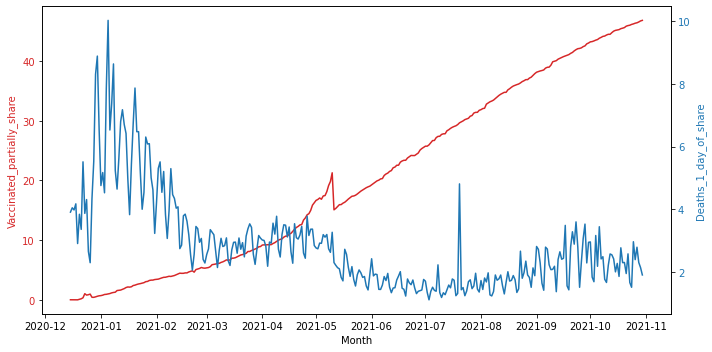

In [51]:
import numpy as np
import matplotlib.pyplot as plt

cor = join[['Year', 'Month', 'Week', 'Day', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month', 'Day']).mean()

# Create some mock data
t = pd.to_datetime(cor.reset_index().Year.astype(str) + '/' + cor.reset_index().Month.astype(str)  + '/' + cor.reset_index().Day.astype(str))
data1 = cor.Vaccinated_partially_share
data2 = cor.Deaths_1_day_of_share

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Vaccinated_partially_share', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths_1_day_of_share', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Корреляция по неделям

In [52]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share>=40] \
.groupby([join.Date.dt.year, join.Date.dt.month, join.Date.dt.week]).mean().corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.987104,0.985361,0.980077,0.152217,-0.748927,-0.655430
Vaccinated_fully_share,0.987104,1.000000,0.969144,0.990681,0.027674,-0.678818,-0.569124
Vaccinated_partially_scaled,0.985361,0.969144,1.000000,0.985077,0.169044,-0.709279,-0.627055
Vaccinated_fully_scaled,0.980077,0.990681,0.985077,1.000000,0.037423,-0.652195,-0.551520
People_partially_vaccinated_1_day_of_share,0.152217,0.027674,0.169044,0.037423,1.000000,-0.437213,-0.502201
Deaths_1_day_of_share,-0.748927,-0.678818,-0.709279,-0.652195,-0.437213,1.000000,0.976716
Deaths_1_day_scaled,-0.655430,-0.569124,-0.627055,-0.551520,-0.502201,0.976716,1.000000


<AxesSubplot:xlabel='Year,Month,Week'>

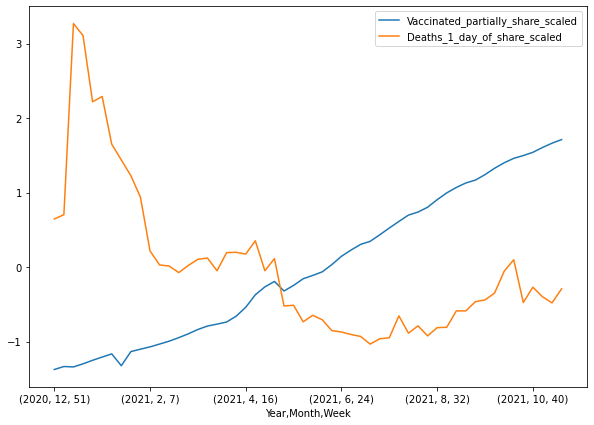

In [53]:
cor = join[['Year', 'Month', 'Week', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month', 'Week']).mean()

for i in cor:
    cor[i + '_scaled'] = (cor[i] - cor[i].mean()) / cor[i].std()
    
cor[[i for i in cor if 'scaled' in i]].plot(figsize=(10,7))    
# cor[['Vaccinated_partially_share_scaled', 'Deaths_1_day_of_share_scaled', 'Vaccinated_partially_scaled_scaled']].plot()

# Корреляция по месяцам

In [54]:
join[['Date','Vaccinated_partially_share', 'Vaccinated_fully_share',
       'Vaccinated_partially_scaled', 'Vaccinated_fully_scaled',
       'People_partially_vaccinated_1_day_of_share', 'Deaths_1_day_of_share', 'Deaths_1_day_scaled']][join.Country_max_vaccinated_partially_share<=10]\
.groupby([join.Date.dt.year, join.Date.dt.month]).mean().corr()

,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,People_partially_vaccinated_1_day_of_share,Deaths_1_day_of_share,Deaths_1_day_scaled
Vaccinated_partially_share,1.000000,0.972475,0.998411,0.969734,0.448491,-0.265105,-0.188479
Vaccinated_fully_share,0.972475,1.000000,0.963606,0.997623,0.557306,-0.208950,-0.063401
Vaccinated_partially_scaled,0.998411,0.963606,1.000000,0.962533,0.429912,-0.236893,-0.186500
Vaccinated_fully_scaled,0.969734,0.997623,0.962533,1.000000,0.568059,-0.210656,-0.085718
People_partially_vaccinated_1_day_of_share,0.448491,0.557306,0.429912,0.568059,1.000000,-0.100238,0.161862
Deaths_1_day_of_share,-0.265105,-0.208950,-0.236893,-0.210656,-0.100238,1.000000,0.863921
Deaths_1_day_scaled,-0.188479,-0.063401,-0.186500,-0.085718,0.161862,0.863921,1.000000


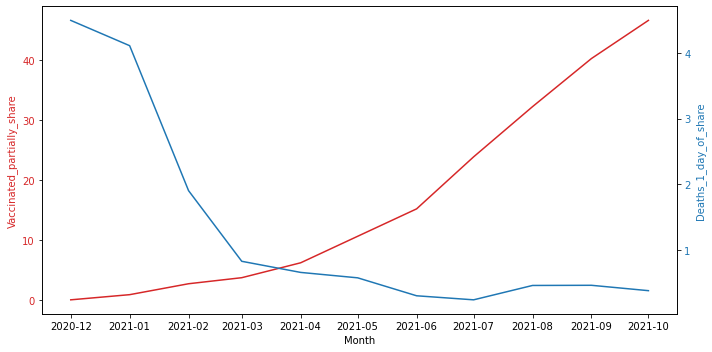

In [55]:
import numpy as np
import matplotlib.pyplot as plt

cor = join[['Year', 'Month', 'Week', 'Vaccinated_partially_share', 'Deaths_1_day_of_share']]. \
groupby(['Year','Month']).median().dropna()

# Create some mock data
t = pd.to_datetime(cor.reset_index().Year.astype(str) + '/' + cor.reset_index().Month.astype(str) + '/01')
data1 = cor.Vaccinated_partially_share
data2 = cor.Deaths_1_day_of_share

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Vaccinated_partially_share', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Deaths_1_day_of_share', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Корреляция по странам

In [56]:
from scipy.stats import pearsonr, spearmanr

## spearmanr

In [57]:
ls_country = []

ls_all_corr = []
ls_all_p = []


ls_week_mean_corr = []
ls_week_mean_p = []

ls_week_median_corr = []
ls_week_median_p = []

ls_month_mean_corr = []
ls_month_mean_p = []

ls_month_median_corr = []
ls_month_median_p = []

ls_max_share_vaccinated = []

ls_mean_daily_share_vaccinated = []
ls_mean_daily_Deaths_1_day_of_share = []


label = 'Vaccinated_partially_scaled'
for i in join.Country.unique():
    try:


        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month']).mean()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_mean_corr.append(res[0])
        ls_month_mean_p.append(res[1])
        
        
        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month']).median()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_median_corr.append(res[0])
        ls_month_median_p.append(res[1])
        
        ls_country.append(i)
        
        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_all_corr.append(res[0])
        ls_all_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month', 'Week']).mean()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_mean_corr.append(res[0])
        ls_week_mean_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna().groupby(['Year','Month', 'Week']).median()
        res = spearmanr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_median_corr.append(res[0])
        ls_week_median_p.append(res[1])
        
        ls_max_share_vaccinated.append(join['Vaccinated_partially_share'][(join.Country==i)].max())
        ls_mean_daily_share_vaccinated.append(join.People_partially_vaccinated_1_day_of_share[(join.Country==i)].median())
        ls_mean_daily_Deaths_1_day_of_share.append(join.Deaths_1_day_of_share[(join.Country==i)].median())
        
        


    except:
        print(i, 'is not done')
        
        
        
res = dict()
res['Country'] = ls_country
res['Share_vaccinated'] = ls_max_share_vaccinated
res['Mean_daily_share_vaccinated'] = ls_mean_daily_share_vaccinated

res['Median_daily_Deaths_1_day_of_share'] = ls_mean_daily_Deaths_1_day_of_share

res['Daily_correlation'] = ls_all_corr
res['Daily_pvalue'] = ls_all_p

res['Weekly_mean_correlation'] = ls_week_mean_corr
res['Weekly_mean_pvalue'] = ls_week_mean_p

res['Weekly_median_correlation'] = ls_week_median_corr
res['Weekly_median_pvalue'] = ls_week_median_p

res['Monthly_mean_correlation'] = ls_month_mean_corr
res['Monthly_mean_pvalue'] = ls_month_mean_p

res['Monthly_median_correlation'] = ls_month_median_corr
res['Monthly_median_pvalue'] = ls_month_median_p



pd.DataFrame.from_dict(res).to_excel(f'result_correlation_spearmanr_{label}.xlsx')
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
res = pd.DataFrame.from_dict(res)
res[res.Daily_pvalue<=0.05].sort_values('Weekly_mean_correlation').reset_index(drop=True)

,Country,Share_vaccinated,Mean_daily_share_vaccinated,Median_daily_Deaths_1_day_of_share,Daily_correlation,Daily_pvalue,Weekly_mean_correlation,Weekly_mean_pvalue,Weekly_median_correlation,Weekly_median_pvalue,Monthly_mean_correlation,Monthly_mean_pvalue,Monthly_median_correlation,Monthly_median_pvalue
0,Peru,56.720761,618.861316,5.853479,-0.827281,2.590668e-67,-0.937681,2.345287e-21,-0.940146,1.009787e-21,-0.950000,0.000088,-0.950000,0.000088
1,Germany,69.328259,1250.160304,1.105231,-0.748852,1.964041e-56,-0.843671,2.185308e-15,-0.844316,1.982804e-15,-0.909091,0.000106,-0.909091,0.000106
2,Saudi Arabia,69.472053,1041.309200,0.086173,-0.290832,1.333021e-03,-0.840533,1.846728e-06,-0.424218,5.528601e-02,-1.000000,0.000000,-0.316228,0.683772
3,France,75.934530,1451.190150,1.706445,-0.786428,8.836400e-66,-0.831576,1.252754e-14,-0.809516,2.176784e-13,-0.890909,0.000233,-0.818182,0.002083
4,United Arab Emirates,97.598985,0.000000,0.404433,-0.724337,4.464580e-49,-0.821921,2.556077e-13,-0.802138,2.521847e-12,-0.862805,0.001309,-0.829209,0.003013
5,Czechia,58.155860,1095.486861,1.729150,-0.802683,9.328383e-70,-0.809519,2.176005e-13,-0.801722,5.471345e-13,-0.818182,0.002083,-0.810936,0.002456
6,Italy,78.284653,1923.295761,1.519629,-0.803529,6.523450e-71,-0.805515,3.511828e-13,-0.803008,4.712966e-13,-0.854545,0.000807,-0.863636,0.000612
7,Belgium,75.267941,950.675221,1.557633,-0.744008,3.573729e-55,-0.772465,1.984081e-11,-0.754902,1.014197e-10,-0.818182,0.002083,-0.833715,0.001427
8,Canada,78.501135,1205.215450,0.131561,-0.724146,1.586291e-49,-0.765241,9.716961e-11,-0.759183,1.661408e-10,-0.793939,0.006100,-0.810991,0.004414
9,Austria,66.183552,1235.813240,1.345713,-0.709608,2.684314e-48,-0.758604,4.694154e-11,-0.739343,2.571575e-10,-0.836364,0.001333,-0.815492,0.002216


## pearsonr

In [58]:
ls_country = []

ls_all_corr = []
ls_all_p = []


ls_week_mean_corr = []
ls_week_mean_p = []

ls_week_median_corr = []
ls_week_median_p = []

ls_month_mean_corr = []
ls_month_mean_p = []

ls_month_median_corr = []
ls_month_median_p = []

ls_max_share_vaccinated = []

ls_mean_daily_share_vaccinated = []
ls_mean_daily_Deaths_1_day_of_share = []

for i in join.Country.unique():
    try:


        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna(). \
        groupby(['Year','Month']).mean()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_mean_corr.append(res[0])
        ls_month_mean_p.append(res[1])
        
        
        df_temp = join[['Year','Month', label, 'Deaths_1_day_of_share']][(join.Country==i)].dropna(). \
        groupby(['Year','Month']).median()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_month_median_corr.append(res[0])
        ls_month_median_p.append(res[1])
        
        ls_country.append(i)
        
        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_all_corr.append(res[0])
        ls_all_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna().groupby(['Year','Month', 'Week']).mean()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_mean_corr.append(res[0])
        ls_week_mean_p.append(res[1])

        df_temp = join[['Year','Month', 'Week', label, 'Deaths_1_day_of_share']][(join.Country==i)]. \
        dropna().groupby(['Year','Month', 'Week']).median()
        res = pearsonr(df_temp[label], df_temp.Deaths_1_day_of_share)
        ls_week_median_corr.append(res[0])
        ls_week_median_p.append(res[1])
        
        ls_max_share_vaccinated.append(join['Vaccinated_partially_share'][(join.Country==i)].max())
        
        ls_mean_daily_share_vaccinated.append(join.People_partially_vaccinated_1_day_of_share[(join.Country==i)].mean())
        
        ls_mean_daily_Deaths_1_day_of_share.append(join.Deaths_1_day_of_share[(join.Country==i)].median())

    except:
        print(i, 'is not done')


res = dict()
res['Country'] = ls_country
res['Share_vaccinated'] = ls_max_share_vaccinated
res['Mean_daily_share_vaccinated'] = ls_mean_daily_share_vaccinated

res['Daily_correlation'] = ls_all_corr
res['Daily_pvalue'] = ls_all_p

res['Weekly_mean_correlation'] = ls_week_mean_corr
res['Weekly_mean_pvalue'] = ls_week_mean_p

res['Weekly_median_correlation'] = ls_week_median_corr
res['Weekly_median_pvalue'] = ls_week_median_p

res['Monthly_mean_correlation'] = ls_month_mean_corr
res['Monthly_mean_pvalue'] = ls_month_mean_p

res['Monthly_median_correlation'] = ls_month_median_corr
res['Monthly_median_pvalue'] = ls_month_median_p



pd.DataFrame.from_dict(res).to_excel(f'result_correlation_pearsonr_{label}.xlsx')
res = pd.DataFrame.from_dict(res)
res[res.Daily_pvalue<=0.05].sort_values('Weekly_mean_correlation').reset_index(drop=True)

,Country,Share_vaccinated,Mean_daily_share_vaccinated,Daily_correlation,Daily_pvalue,Weekly_mean_correlation,Weekly_mean_pvalue,Weekly_median_correlation,Weekly_median_pvalue,Monthly_mean_correlation,Monthly_mean_pvalue,Monthly_median_correlation,Monthly_median_pvalue
0,Slovakia,45.748125,1502.130162,-0.881865,1.178282e-98,-0.937019,1.439951e-23,-0.929600,1.915669e-22,-0.955805,0.000016,-0.948881,0.000028
1,Italy,78.284653,2549.596135,-0.886077,3.411176e-104,-0.914761,1.019353e-21,-0.914283,1.168871e-21,-0.941776,0.000015,-0.932429,0.000029
2,Czechia,58.155860,1888.071578,-0.879704,1.668024e-99,-0.901987,3.065765e-20,-0.897579,8.912108e-20,-0.920673,0.000058,-0.914029,0.000083
3,France,75.934530,2474.231092,-0.716655,1.175011e-49,-0.872156,1.853231e-17,-0.868657,3.531510e-17,-0.943773,0.000013,-0.935738,0.000023
4,Belgium,75.267941,2456.072956,-0.769985,2.824620e-61,-0.862539,2.083442e-16,-0.844902,3.425199e-15,-0.844671,0.001068,-0.828160,0.001641
5,Peru,56.720761,2167.705297,-0.763299,1.940782e-51,-0.855911,6.781439e-14,-0.845669,2.665448e-13,-0.874805,0.002018,-0.867720,0.002430
6,Saudi Arabia,69.472053,5837.987615,-0.299137,9.505531e-04,-0.836025,2.362345e-06,-0.762660,5.824734e-05,-0.970016,0.029984,-0.796585,0.203415
7,Austria,66.183552,2138.696312,-0.753054,2.148792e-57,-0.833370,9.755708e-15,-0.832045,1.173885e-14,-0.830947,0.001531,-0.816752,0.002153
8,Poland,53.311474,1741.354747,-0.651206,2.635328e-38,-0.819596,1.092038e-13,-0.793153,2.386757e-12,-0.850816,0.000899,-0.855921,0.000775
9,Netherlands,74.472057,2560.293201,-0.741493,6.368274e-50,-0.817715,1.310986e-12,-0.789112,2.688899e-11,-0.846724,0.001998,-0.813087,0.004233


# Уровень корреляции при разных процентах вакцинации

<AxesSubplot:xlabel='Процент вакцинированных <'>

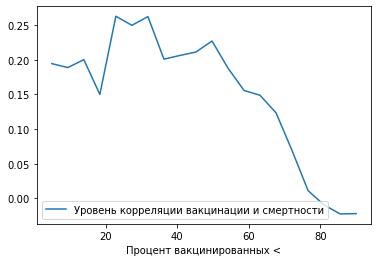

In [59]:
ls_cor = []
for i in np.linspace(5,90, 20):
    ls_cor.append(spearmanr(join.Vaccinated_partially_share[join.Country_max_vaccinated_partially_share<i], \
                            join.Deaths_1_day_of_share[join.Country_max_vaccinated_partially_share<i])[0])
ls_cor = pd.DataFrame(ls_cor)
ls_cor.columns = ['Уровень корреляции вакцинации и смертности']
ls_cor['Процент вакцинированных <'] = np.linspace(5,90, 20)
ls_cor.set_index('Процент вакцинированных <').plot()

<AxesSubplot:xlabel='Процент вакцинированных >'>

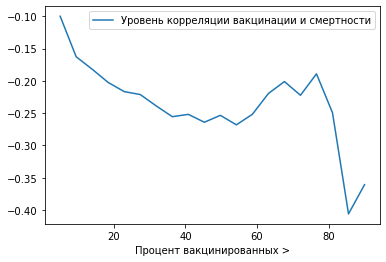

In [60]:
ls_cor = []
for i in np.linspace(5,90, 20):
    ls_cor.append(spearmanr(join.Vaccinated_partially_share[join.Country_max_vaccinated_partially_share>i], \
                            join.Deaths_1_day_of_share[join.Country_max_vaccinated_partially_share>i])[0])
ls_cor = pd.DataFrame(ls_cor)
ls_cor.columns = ['Уровень корреляции вакцинации и смертности']
ls_cor['Процент вакцинированных >'] = np.linspace(5,90, 20)
ls_cor.set_index('Процент вакцинированных >').plot()

In [61]:
join.head()

,Country,Date,People_partially_vaccinated,People_fully_vaccinated,Confirmed,Deaths,Recovered,Population,Deaths_1_day,Confirmed_1_day,Recovered_1_day,People_partially_vaccinated_1_day,People_fully_vaccinated_1_day,People_partially_vaccinated_1_day_of_share,Vaccinated_partially_share,Vaccinated_fully_share,Vaccinated_partially_scaled,Vaccinated_fully_scaled,Deaths_1_day_of_share,Deaths_1_day_scaled,Country_max_vaccinated_partially_share,Month,Year,Week,Day
403,Afghanistan,2021-02-28,8200.0,0.0,55714.0,2443.0,49333.0,38928341.0,0.0,7.0,45.0,8200.0,0.0,210.643449,0.021064,0.0,-1.572528,-0.925457,0.000000,-0.715627,6.19667,2,2021,8,28
404,Afghanistan,2021-03-01,8200.0,0.0,55733.0,2444.0,49344.0,38928341.0,1.0,19.0,11.0,0.0,0.0,0.000000,0.021064,0.0,-1.572528,-0.925457,0.025688,-0.681005,6.19667,3,2021,9,1
405,Afghanistan,2021-03-02,8200.0,0.0,55759.0,2446.0,49347.0,38928341.0,2.0,26.0,3.0,0.0,0.0,0.000000,0.021064,0.0,-1.572528,-0.925457,0.051376,-0.646383,6.19667,3,2021,9,2
406,Afghanistan,2021-03-03,8200.0,0.0,55770.0,2446.0,49359.0,38928341.0,0.0,11.0,12.0,0.0,0.0,0.000000,0.021064,0.0,-1.572528,-0.925457,0.000000,-0.715627,6.19667,3,2021,9,3
407,Afghanistan,2021-03-04,8200.0,0.0,55775.0,2446.0,49362.0,38928341.0,0.0,5.0,3.0,0.0,0.0,0.000000,0.021064,0.0,-1.572528,-0.925457,0.000000,-0.715627,6.19667,3,2021,9,4


# АБ тест - доли данамические
Например вакцинированные - это те, у кого процент вакцинации больше 40%, а невакцинированные - это те, у кого процент меньше 40% и тд в разрезах: 10, 20, 30, 40, 50, 60 ,70, 80, 90

In [63]:
res = dict()
margin_ls = []
margin_ls_2 = []
ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin)].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<margin)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    
    margin_ls.append(str(margin) + '-100')
    margin_ls_2.append('0-' + str(margin))
    
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [64]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = margin_ls_2


res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [65]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-100,0-20,1.400603e-10,2.724889e-02,2.340743,2.478042,5.865597,0.514005,0.537442,4.559640,False
1,30-100,0-30,1.747649e-49,6.385593e-23,2.006533,2.641068,31.623451,0.430592,0.592593,37.623028,False
2,40-100,0-40,3.617201e-91,4.126491e-88,1.633955,2.715893,66.215934,0.347347,0.616694,77.544010,False
3,50-100,0-50,7.241945e-133,7.504837e-111,1.449381,2.680389,84.933325,0.276551,0.632442,128.689042,False
4,60-100,0-60,3.808851e-143,5.639770e-98,1.301136,2.606290,100.308717,0.195824,0.606833,209.886644,False
5,70-100,0-70,3.113987e-107,4.621272e-48,1.031446,2.509494,143.298724,0.131561,0.577427,338.904668,False
6,80-100,0-80,4.401408e-24,7.172527e-27,0.721512,2.438027,237.905086,0.202216,0.534339,164.241442,False


# АБ тест - доли данамические для вакцинированных и статичные для невакцинированных
Например вакцинированные - это те, у кого процент вакцинации больше от 40% до 60%, а невакцинированные - это те, у кого процент всегда меньше 20%, т.е. доли меняются только у вакцинированных 

In [66]:
res = dict()
margin_ls = []

ttest_change_ls = []
mannwhitneyu_change_ls = []
x_change_means = []
y_change_means = []
x_change_median = []
y_change_median = []
var_change = []
cnt_change = []

label = 'Vaccinated_partially_share'
for margin in [20, 30, 40, 50, 60 ,70, 80]:
    
    x = join[(join[label]>=margin) & ((join[label]<=margin+20))].Deaths_1_day_of_share.dropna()
    y = join[(join[label]<20)].Deaths_1_day_of_share.dropna()
    
    equal_variance = levene(x, y)[1] >=0.05
    var_change.append(equal_variance)
    margin_ls.append(str(margin) + '-' + str(margin+20))
    ttest_change_ls.append(ttest_ind(x, y, equal_var=equal_variance)[1])
    mannwhitneyu_change_ls.append(mannwhitneyu(x, y)[1])
    x_change_means.append(x.mean())
    y_change_means.append(y.mean())
    x_change_median.append(x.median())
    y_change_median.append(y.median())
    cnt_change.append((x.shape[0], y.shape[0]))

In [67]:
res['Процент вакцинированных'] = margin_ls
res['Процент невакцинированных'] = '0-20'

res['Вероятность ошибки mannwhitneyu'] = mannwhitneyu_change_ls
res['Вероятность ошибки ttest'] = ttest_change_ls
res['Средняя смернтность для вакцинированных на 1 млн чел'] = x_change_means
res['Средняя смернтность для невакцинированных на 1 млн чел'] = y_change_means
res['Разница средних смертности %'] = (np.array(y_change_means) - np.array(x_change_means)) / \
np.array(x_change_means) * 100

res['Медиана смернтности для вакцинированных на 1 млн чел'] = x_change_median
res['Медиана смернтности для невакцинированных на 1 млн чел'] = y_change_median
res['Разница медиан смерности %'] = (np.array(y_change_median) - np.array(x_change_median)) / \
np.array(x_change_median) * 100

res['Дисперсии групп равны'] = var_change

In [68]:
pd.DataFrame().from_dict(res)

,Процент вакцинированных,Процент невакцинированных,Вероятность ошибки mannwhitneyu,Вероятность ошибки ttest,Средняя смернтность для вакцинированных на 1 млн чел,Средняя смернтность для невакцинированных на 1 млн чел,Разница средних смертности %,Медиана смернтности для вакцинированных на 1 млн чел,Медиана смернтности для невакцинированных на 1 млн чел,Разница медиан смерности %,Дисперсии групп равны
0,20-40,0-20,8.355229e-27,6.288809e-16,3.542534,2.478042,-30.048881,1.057178,0.537442,-49.162572,False
1,30-50,0-20,1.524024e-07,2.066995e-03,2.864639,2.478042,-13.495493,0.828253,0.537442,-35.111325,False
2,40-60,0-20,4.356665e-02,6.816292e-13,2.000279,2.478042,23.884824,0.560806,0.537442,-4.166030,False
3,50-70,0-20,3.718315e-37,2.204207e-56,1.620417,2.478042,52.926185,0.346141,0.537442,55.267011,False
4,60-80,0-20,1.074906e-100,6.320060e-70,1.352116,2.478042,83.271392,0.193172,0.537442,178.218832,False
5,70-90,0-20,5.256804e-93,1.028569e-46,1.015872,2.478042,143.932483,0.171485,0.537442,213.404259,False
6,80-100,0-20,8.532905e-18,1.901508e-189,0.482232,2.478042,413.868966,0.202216,0.537442,165.775916,False


In [ ]:
# # Регионы
# import pandas as pd
# regions = pd.read_excel('https://rosstat.gov.ru/storage/mediabank/6F3rqSlB/Popul2021_Site.xls')
# regions = regions[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']]
# regions.columns = ['Region', 'Region_population_all', 'Region_population_city', 'Region_population_country']
# regions = regions.iloc[5:,:].reset_index(drop=True)
# regions.head()